**Mounting The Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [2]:
import os
import h5py
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Path to where hdf5 dataset stored

In [3]:
output_path = "/content/drive/MyDrive/TPR Project/dataset.hdf5"

**Preprocessing**

1. Function to convert images (Standard Scaler, RGB2GRAY)

In [4]:
def preprocess_image_standard(hdf5_path, color_conversion=cv2.COLOR_BGR2GRAY):
    # Load the data into array
    with h5py.File(hdf5_path, 'r') as file:
        images = np.array(file['images'])
        labels = np.array(file['labels'])

    # Convert to grayscale and flattening the images
    images_processed = [cv2.cvtColor(image, color_conversion).flatten() for image in images]

    # Standardizing the pixel values
    scaler = StandardScaler()
    images_standardized = scaler.fit_transform(images_processed)

    return images_standardized, labels, scaler

In [5]:
#Function Call
images_standardized, labels, scaler = preprocess_image_standard(output_path)

In [6]:
#Splitting The dataset
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(images_standardized, labels,
                                                                    test_size=0.25,shuffle=True,stratify = labels,
                                                                    random_state=42)

In [7]:
#Printing split The dataset
print(f"Shape of X_train: {X_train_std.shape}")
print(f"Shape of y_train: {y_train_std.shape}")
print(f"Shape of X_test: {X_test_std.shape}")
print(f"Shape of y_test: {y_test_std.shape}")

Shape of X_train: (251, 16384)
Shape of y_train: (251,)
Shape of X_test: (84, 16384)
Shape of y_test: (84,)


In [8]:
#Ploting images that are being processed(Standard Scaler)

def plot_images_from_each_class(X, y, num_images=10):
    unique_labels = np.unique(y)
    fig, axs = plt.subplots(len(unique_labels), num_images, figsize=(20, 10))

    for i, label in enumerate(unique_labels):
        # Finding indices of images with the current label
        indices = np.where(y == label)[0]
        # Select 10 images for the current label
        selected_indices = indices[:num_images]
        for j, idx in enumerate(selected_indices):
            image = X[idx].reshape(128, 128)
            axs[i, j].imshow(image, cmap='gray')
            axs[i, j].axis('off')
            if j == 0:
                axs[i, j].set_ylabel(f'Label {label}')

    plt.show()

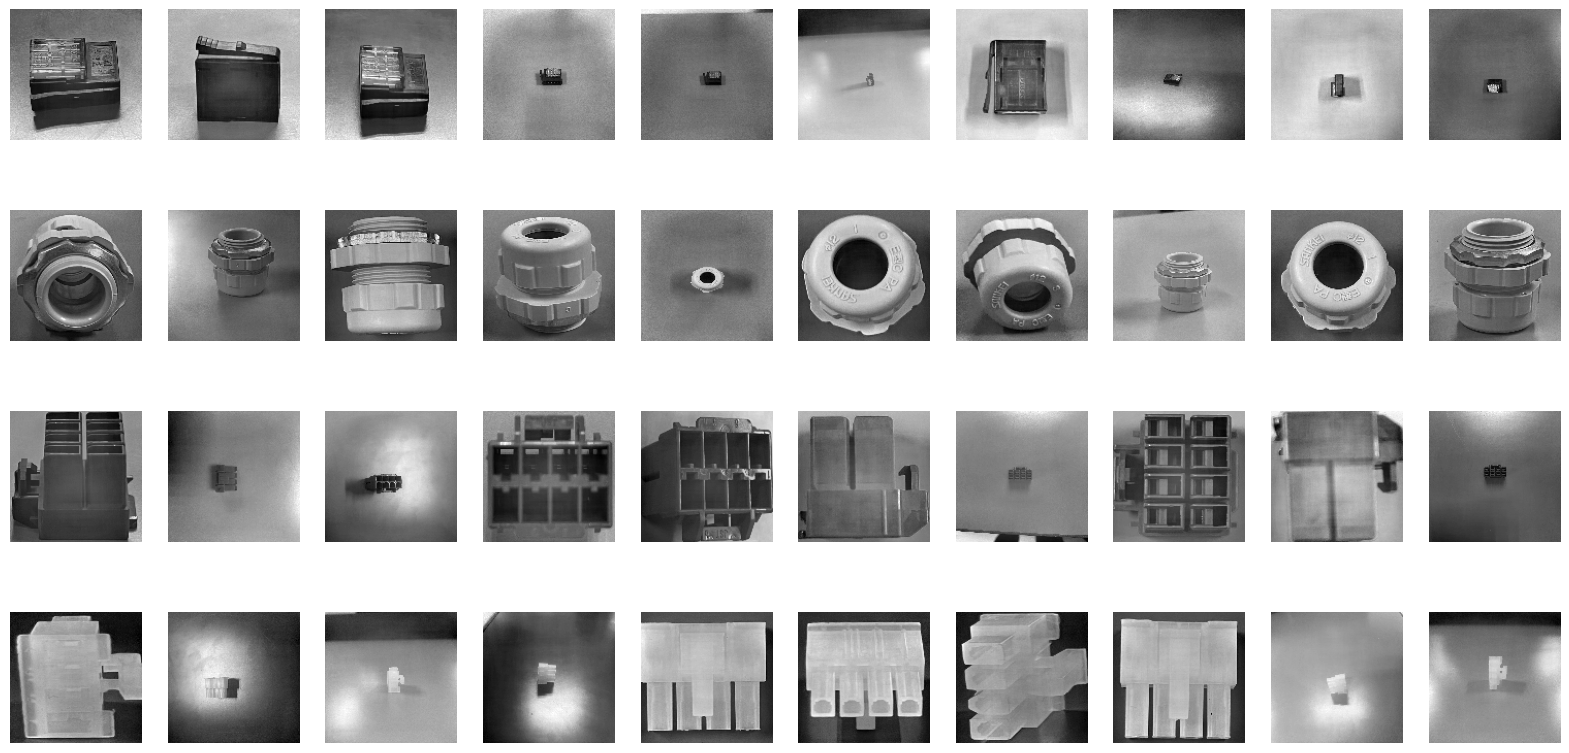

In [9]:
plot_images_from_each_class(X_train_std, y_train_std)

2. Function to convert images (Normal, no scalling, no color changing)

In [10]:
def preprocess_image(hdf5_path):
    # Load the data into array
    with h5py.File(hdf5_path, 'r') as file:
        images = np.array(file['images'])
        labels = np.array(file['labels'])

    images_flattened = [image.flatten() for image in images]

    #list to a numpy array
    images_flattened = np.array(images_flattened)

    return images_flattened, labels

In [11]:
#Function Call
images_flattened, labels = preprocess_image(output_path)

In [12]:
#Splitting The dataset
X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels,
                                                    test_size=0.25,shuffle=True,stratify = labels, random_state=42)

In [13]:
#Printing split The dataset
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (251, 49152)
Shape of y_train: (251,)
Shape of X_test: (84, 49152)
Shape of y_test: (84,)


In [14]:
#Ploting images that are being processed(No scaling)

def plot_images_from_each_class(X, y, num_images=10):
    unique_labels = np.unique(y)
    fig, axs = plt.subplots(len(unique_labels), num_images, figsize=(20, 10))

    for i, label in enumerate(unique_labels):
        # Find indices of images with the current label
        indices = np.where(y == label)[0]
        # Select 10 images for the current label
        selected_indices = indices[:num_images]
        for j, idx in enumerate(selected_indices):
            image = X[idx].reshape(128, 128,3)
            axs[i, j].imshow(image, cmap='gray')
            axs[i, j].axis('off')
            if j == 0:
                axs[i, j].set_ylabel(f'Label {label}')

    plt.show()

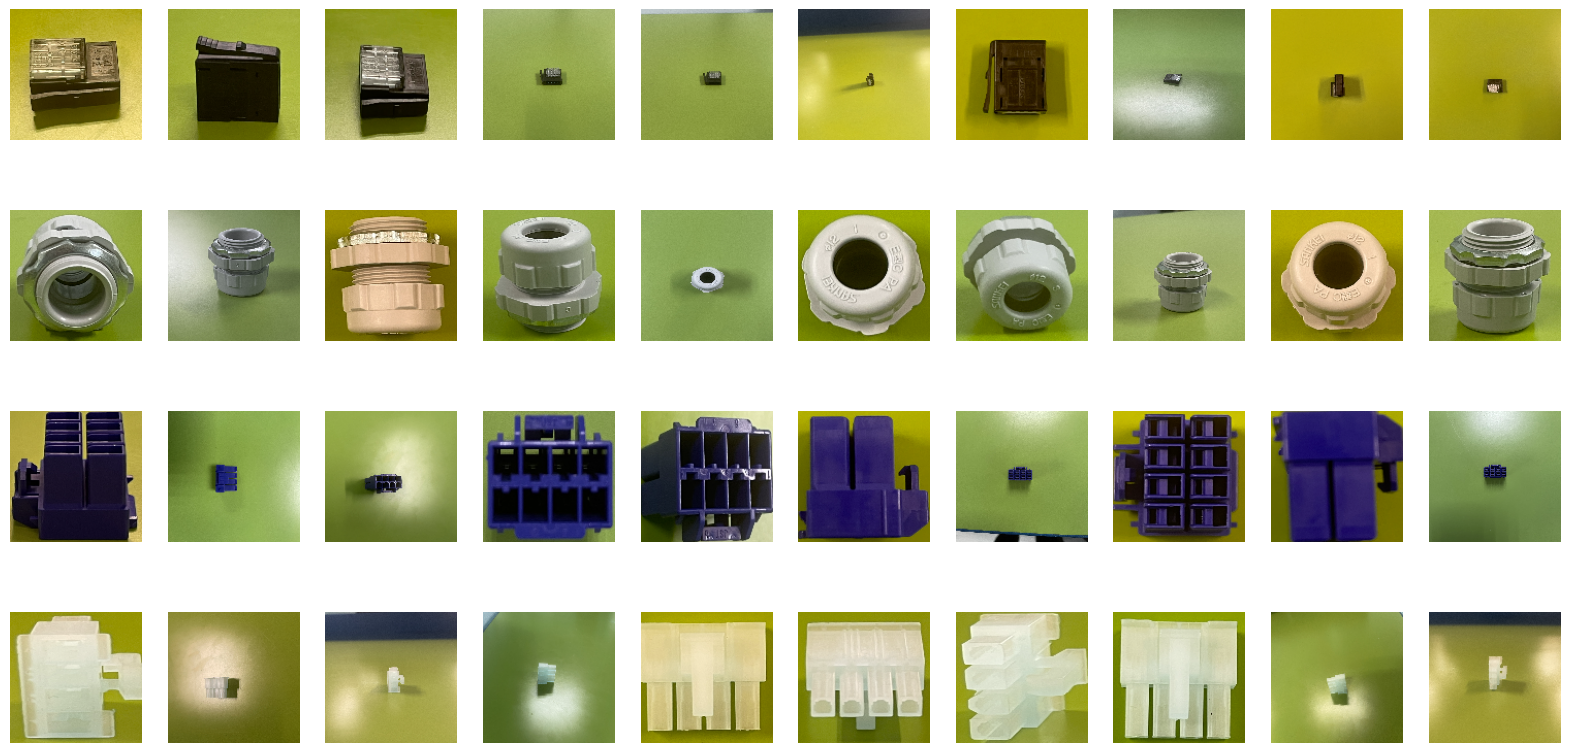

In [15]:
plot_images_from_each_class(X_train, y_train)

3. Function to convert images (MinMax Scaler, RGB2GRAY)

In [16]:
def preprocess_image_minmax(hdf5_path, color_conversion=cv2.COLOR_RGB2GRAY):
    # Load the data into array
    with h5py.File(hdf5_path, 'r') as file:
        images = np.array(file['images'])
        labels = np.array(file['labels'])

    # Grayscaling and flattening the images
    images_processed = [cv2.cvtColor(image, color_conversion).flatten() for image in images]

    # Standardize the pixel values
    minmax_scaler = MinMaxScaler()
    images_standardized_minmax = minmax_scaler.fit_transform(images_processed)

    return images_standardized_minmax, labels, minmax_scaler

In [17]:
#Function Call
images_standardized_minmax, labels, minmax_scaler = preprocess_image_minmax(output_path)

In [18]:
#Splitting The dataset
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(images_standardized_minmax, labels,
                                                                                test_size=0.25,shuffle=True,stratify = labels, random_state=42)

In [19]:
#Printing split The dataset
print(f"Shape of X_train: {X_train_minmax.shape}")
print(f"Shape of y_train: {y_train_minmax.shape}")
print(f"Shape of X_test: {X_test_minmax.shape}")
print(f"Shape of y_test: {y_test_minmax.shape}")

Shape of X_train: (251, 16384)
Shape of y_train: (251,)
Shape of X_test: (84, 16384)
Shape of y_test: (84,)


In [20]:
#Ploting images that are being processed(MinMax Scaler)

def plot_images_from_each_class(X, y, num_images=10):
    unique_labels = np.unique(y)
    fig, axs = plt.subplots(len(unique_labels), num_images, figsize=(20, 10))

    for i, label in enumerate(unique_labels):
        # Find indices of images with the current label
        indices = np.where(y == label)[0]
        # Select 10 images for the current label
        selected_indices = indices[:num_images]
        for j, idx in enumerate(selected_indices):
            image = X[idx].reshape(128, 128)  # Reshape the image to its original dimensions
            axs[i, j].imshow(image, cmap='gray')
            axs[i, j].axis('off')
            if j == 0:
                axs[i, j].set_ylabel(f'Label {label}')

    plt.show()

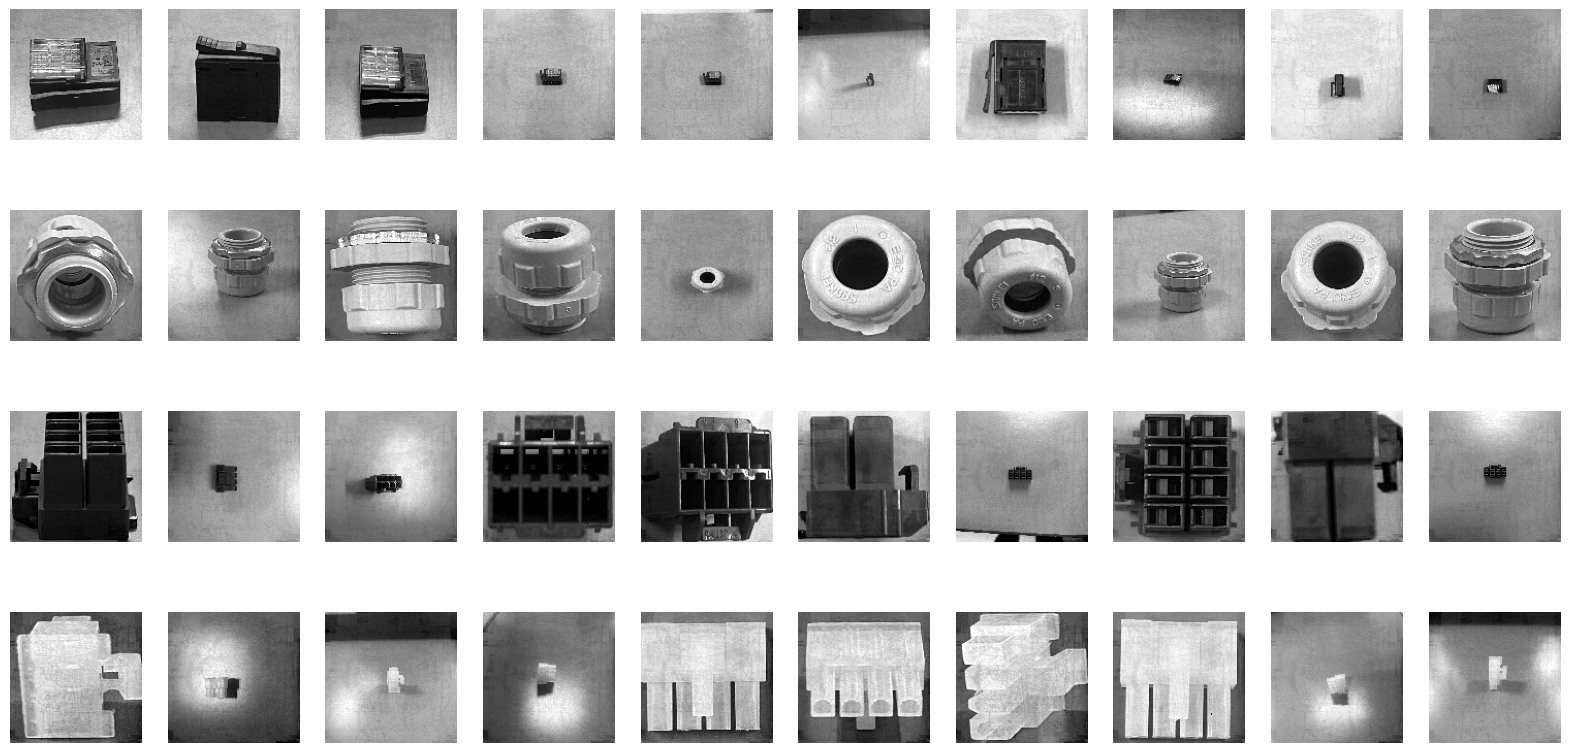

In [21]:
plot_images_from_each_class(X_train_minmax, y_train_minmax)

**PCA With Different Preprocessor Function**



With standard scaling PCA

In [22]:
# Apply PCA
n_components = 40
pca_std = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train_std)


pca_std.fit(X_train_std, y_train_std)
X_train_pca_std = pca_std.transform(X_train_std)
X_test_pca_std = pca_std.transform(X_test_std)

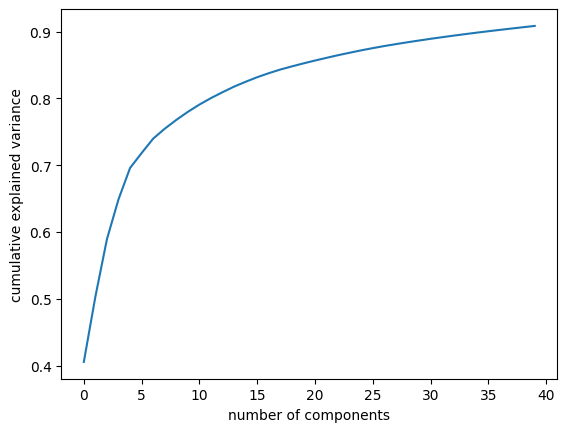

In [23]:
plt.plot(np.cumsum(pca_std.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

With minmax scaling PCA

In [24]:
# Apply PCA
n_components = 40
pca_minmax = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train_minmax)


pca_minmax.fit(X_train_minmax, y_train_minmax)
X_train_pca_minmax = pca_minmax.transform(X_train_minmax)
X_test_pca_minmax = pca_minmax.transform(X_test_minmax)

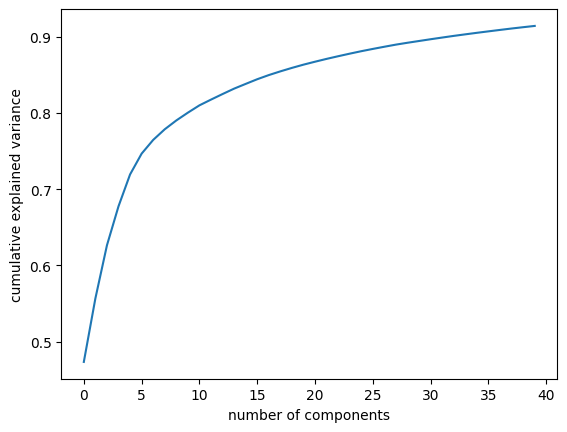

In [25]:
plt.plot(np.cumsum(pca_minmax.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

With normal PCA

In [26]:
# Apply PCA
n_components = 40
pca_normal = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

# Projecting the input data on the eigenfaces orthonormal basis
pca_normal.fit(X_train, y_train)
X_train_pca_normal = pca_normal.transform(X_train)
X_test_pca_normal = pca_normal.transform(X_test)

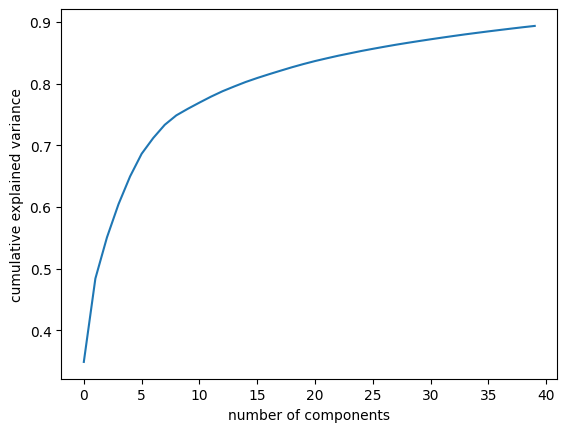

In [27]:
plt.plot(np.cumsum(pca_normal.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

**LDA With Different Preprocessor Function**

With standard scaling LDA

In [28]:
#Apply LDA
lda_std = LinearDiscriminantAnalysis(n_components=3)

# fit LDA and transform the data
lda_std.fit(X_train_std, y_train_std)
X_train_lda_std = lda_std.transform(X_train_std)
X_test_lda_std = lda_std.transform(X_test_std)

With minmax scaling LDA

In [29]:
#Apply LDA
lda_minmax = LinearDiscriminantAnalysis(n_components=3)

# fit LDA and transform the data
lda_minmax.fit(X_train_minmax, y_train_minmax)
X_train_lda_minmax = lda_minmax.transform(X_train_minmax)
X_test_lda_minmax = lda_minmax.transform(X_test_minmax)

With no scaling LDA

In [30]:
#Apply LDA
lda_normal = LinearDiscriminantAnalysis(n_components=3)

# fit LDA and transform the data
lda_normal.fit(X_train, y_train)
X_train_lda_normal = lda_normal.transform(X_train)
X_test_lda_normal = lda_normal.transform(X_test)

**Confusion Matrix Function**

In [31]:
# Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, title, file_name):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(file_name)
    plt.show()

**SVM with PCA(Std, MinMax, Normal)**

In [32]:
# With Standard Function PCA
svc_classifier_pca_std = svm.SVC()
svc_classifier_pca_std.fit(X_train_pca_std, y_train_std)
y_pred_pca_std_svc = svc_classifier_pca_std.predict(X_test_pca_std)

print("With Standard Function PCA(SVC)")
print(classification_report(y_test_std, y_pred_pca_std_svc, zero_division=1))

# With MinMax Function PCA
svc_classifier_pca_minmax = svm.SVC()
svc_classifier_pca_minmax.fit(X_train_pca_minmax, y_train_minmax)
y_pred_pca_minmax_svc = svc_classifier_pca_minmax.predict(X_test_pca_minmax)

print("With MinMax Function PCA(SVC)")
print(classification_report(y_test_minmax, y_pred_pca_minmax_svc, zero_division=1))


# With Normal Function PCA
svc_classifier_pca_normal = svm.SVC()
svc_classifier_pca_normal.fit(X_train_pca_normal, y_train)
y_pred_pca_normal_svc = svc_classifier_pca_normal.predict(X_test_pca_normal)

print("With No Scaling Function PCA(SVC)")
print(classification_report(y_test, y_pred_pca_normal_svc, zero_division=1))

With Standard Function PCA(SVC)
                           precision    recall  f1-score   support

b'Black_sensor_connector'       0.62      0.83      0.71        24
      b'Grey_Cable_Gland'       0.75      0.75      0.75        20
         b'Red_connector'       0.94      0.80      0.86        20
       b'White_connector'       1.00      0.75      0.86        20

                 accuracy                           0.79        84
                macro avg       0.83      0.78      0.80        84
             weighted avg       0.82      0.79      0.79        84

With MinMax Function PCA(SVC)
                           precision    recall  f1-score   support

b'Black_sensor_connector'       0.61      0.92      0.73        24
      b'Grey_Cable_Gland'       0.80      0.60      0.69        20
         b'Red_connector'       1.00      0.80      0.89        20
       b'White_connector'       0.94      0.80      0.86        20

                 accuracy                           0.79      

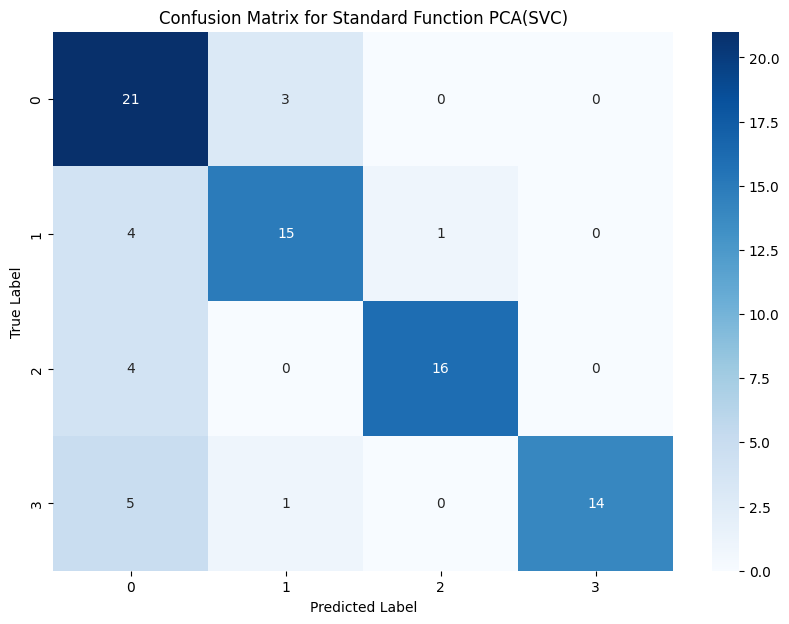

In [ ]:
# Confusion Matrix for Standard Function PCA(SVC)
plot_confusion_matrix(y_test_std, y_pred_pca_std_svc, "Confusion Matrix for Standard Function PCA(SVC)",
                      "Confusion Matrix for Standard Function PCA(SVC).jpg")

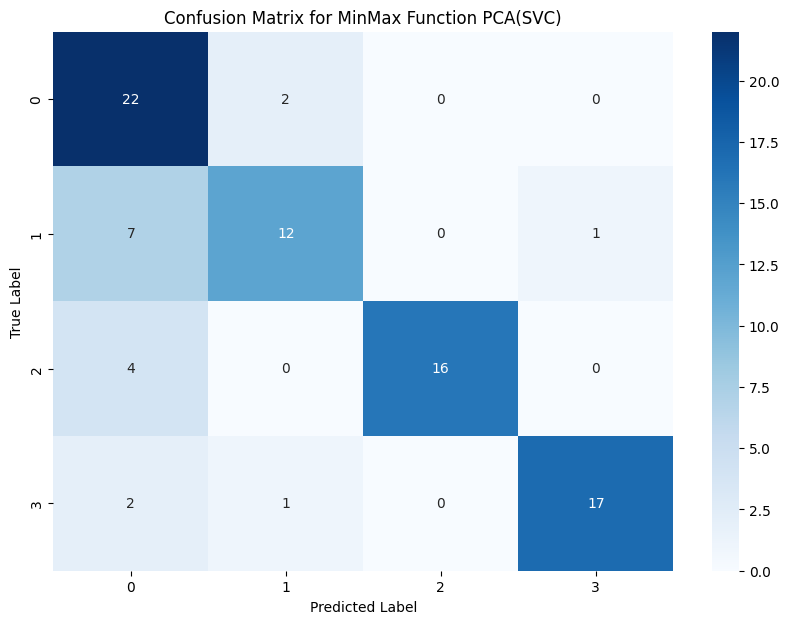

In [ ]:
# Confusion Matrix for MinMax Function PCA(SVC)
plot_confusion_matrix(y_test_minmax, y_pred_pca_minmax_svc, "Confusion Matrix for MinMax Function PCA(SVC)","Confusion Matrix for MinMax Function PCA(SVC).jpg")

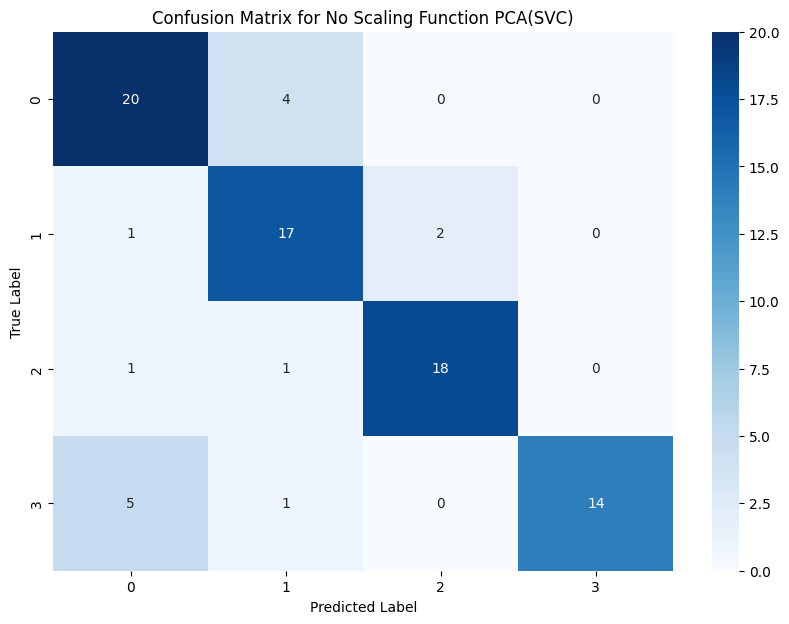

In [ ]:
# Confusion Matrix for No Scaling Function PCA(SVC)
plot_confusion_matrix(y_test, y_pred_pca_normal_svc, "Confusion Matrix for No Scaling Function PCA(SVC)", "Confusion Matrix for No Scaling Function PCA(SVC).jpg")

**SVM with LDA(Std, MinMax, Normal)**

In [33]:
# With Standard Function LDA
svc_classifier_lda_std = svm.SVC()
svc_classifier_lda_std.fit(X_train_lda_std, y_train_std)
y_pred_lda_std_svc = svc_classifier_lda_std.predict(X_test_lda_std)

print("With Standard Function LDA(SVC)")
print(classification_report(y_test_std, y_pred_lda_std_svc, zero_division=1))

# With MinMax Function LDA
svc_classifier_lda_minmax = svm.SVC()
svc_classifier_lda_minmax.fit(X_train_lda_minmax, y_train_minmax)
y_pred_lda_minmax_svc = svc_classifier_lda_minmax.predict(X_test_lda_minmax)

print("With MinMax Function LDA(SVC)")
print(classification_report(y_test_minmax, y_pred_lda_minmax_svc, zero_division=1))


# With Normal Function LDA
svc_classifier_lda_normal = svm.SVC()
svc_classifier_lda_normal.fit(X_train_lda_normal, y_train)
y_pred_lda_normal_svc = svc_classifier_lda_normal.predict(X_test_lda_normal)

print("With No Scaling Function LDA(SVC)")
print(classification_report(y_test, y_pred_lda_normal_svc, zero_division=1))

With Standard Function LDA(SVC)
                           precision    recall  f1-score   support

b'Black_sensor_connector'       0.49      0.71      0.58        24
      b'Grey_Cable_Gland'       0.71      0.50      0.59        20
         b'Red_connector'       0.72      0.65      0.68        20
       b'White_connector'       0.88      0.75      0.81        20

                 accuracy                           0.65        84
                macro avg       0.70      0.65      0.66        84
             weighted avg       0.69      0.65      0.66        84

With MinMax Function LDA(SVC)
                           precision    recall  f1-score   support

b'Black_sensor_connector'       0.53      0.67      0.59        24
      b'Grey_Cable_Gland'       0.75      0.60      0.67        20
         b'Red_connector'       0.81      0.85      0.83        20
       b'White_connector'       0.94      0.80      0.86        20

                 accuracy                           0.73      

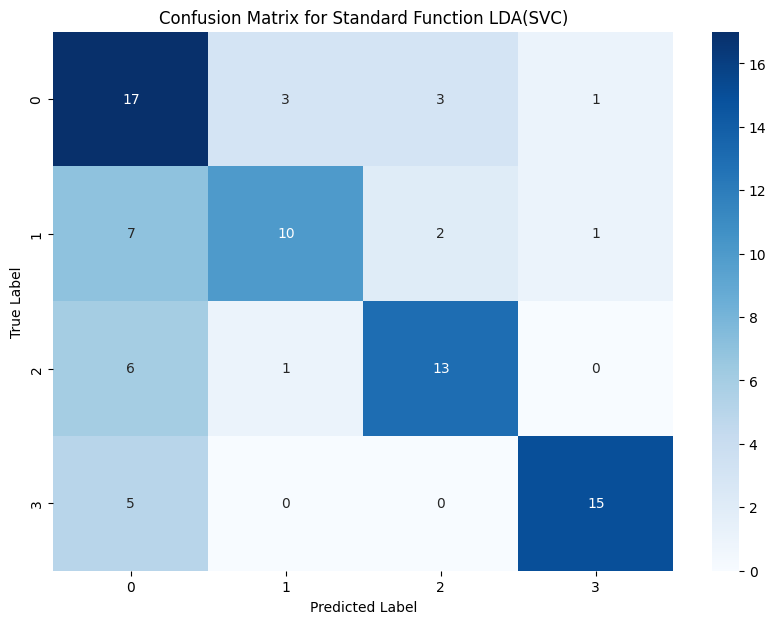

In [ ]:
# Confusion Matrix for Standard Function LDA(SVC)
plot_confusion_matrix(y_test_std, y_pred_lda_std_svc, "Confusion Matrix for Standard Function LDA(SVC)", "Confusion Matrix for Standard Function LDA(SVC).jpg")

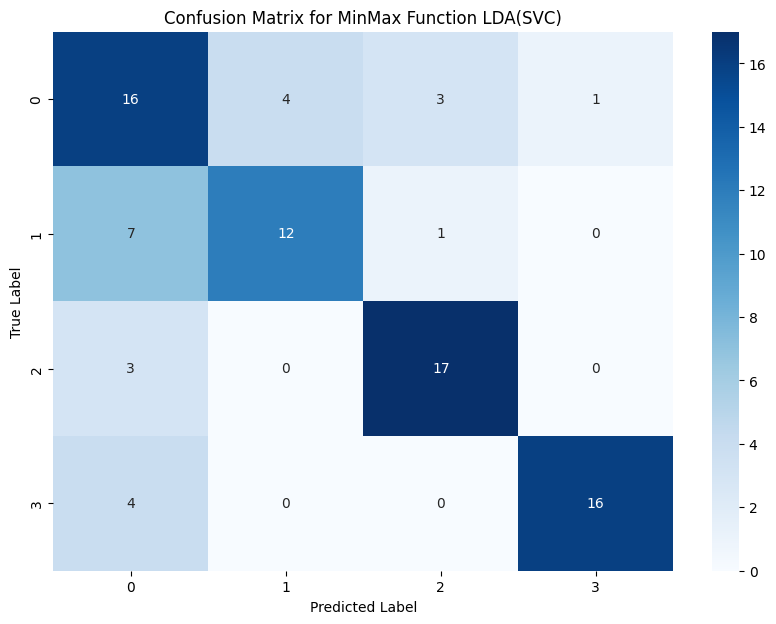

In [ ]:
# Confusion Matrix for MinMax Function LDA(SVC)
plot_confusion_matrix(y_test_minmax, y_pred_lda_minmax_svc, "Confusion Matrix for MinMax Function LDA(SVC)","Confusion Matrix for MinMax Function LDA(SVC).jpg")

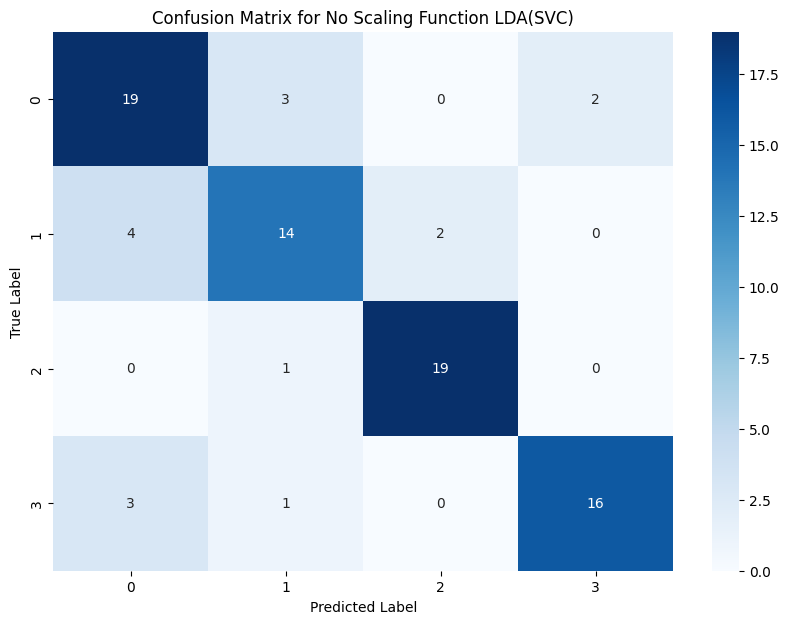

In [ ]:
# Confusion Matrix for No Scaling Function LDA(SVC)
plot_confusion_matrix(y_test, y_pred_lda_normal_svc, "Confusion Matrix for No Scaling Function LDA(SVC)", "Confusion Matrix for No Scaling Function LDA(SVC).jpg")

**KNN with PCA(Std, MinMax, Normal)**

In [34]:
# With Standard Function PCA
knn_classifier_pca_std = KNeighborsClassifier(n_neighbors=3)
knn_classifier_pca_std.fit(X_train_pca_std, y_train_std)
y_pred_knn_pca_std = knn_classifier_pca_std.predict(X_test_pca_std)

print("KNN Classification Report: pca_std")
print(classification_report(y_test_std, y_pred_knn_pca_std, zero_division=1))

# With MinMax Function PCA

knn_classifier_pca_minmax = KNeighborsClassifier(n_neighbors=3)
knn_classifier_pca_minmax.fit(X_train_pca_minmax, y_train_minmax)
y_pred_knn_pca_minmax = knn_classifier_pca_minmax.predict(X_test_pca_minmax)

print("KNN Classification Report: pca_minmax")
print(classification_report(y_test_minmax, y_pred_knn_pca_minmax, zero_division=1))

# With NOrmal Function PCA

knn_classifier_pca_normal = KNeighborsClassifier(n_neighbors=3)
knn_classifier_pca_normal.fit(X_train_pca_normal, y_train)
y_pred_knn_pca_normal = knn_classifier_pca_normal.predict(X_test_pca_normal)

print("KNN Classification Report: pca_normal")
print(classification_report(y_test, y_pred_knn_pca_normal, zero_division=1))

KNN Classification Report: pca_std
                           precision    recall  f1-score   support

b'Black_sensor_connector'       0.38      0.75      0.50        24
      b'Grey_Cable_Gland'       0.40      0.20      0.27        20
         b'Red_connector'       0.91      0.50      0.65        20
       b'White_connector'       0.87      0.65      0.74        20

                 accuracy                           0.54        84
                macro avg       0.64      0.53      0.54        84
             weighted avg       0.63      0.54      0.54        84

KNN Classification Report: pca_minmax
                           precision    recall  f1-score   support

b'Black_sensor_connector'       0.38      0.67      0.48        24
      b'Grey_Cable_Gland'       0.56      0.25      0.34        20
         b'Red_connector'       1.00      0.55      0.71        20
       b'White_connector'       0.73      0.80      0.76        20

                 accuracy                          

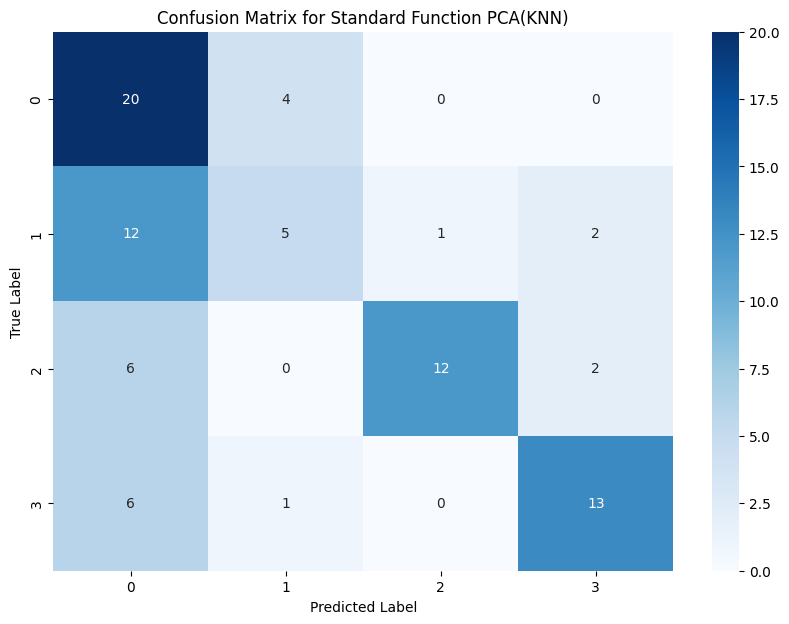

In [ ]:
# Confusion Matrix for Standard Function PCA(KNN)
plot_confusion_matrix(y_test_std, y_pred_knn_pca_std, "Confusion Matrix for Standard Function PCA(KNN)", "Confusion Matrix for Standard Function PCA(KNN).jpg")

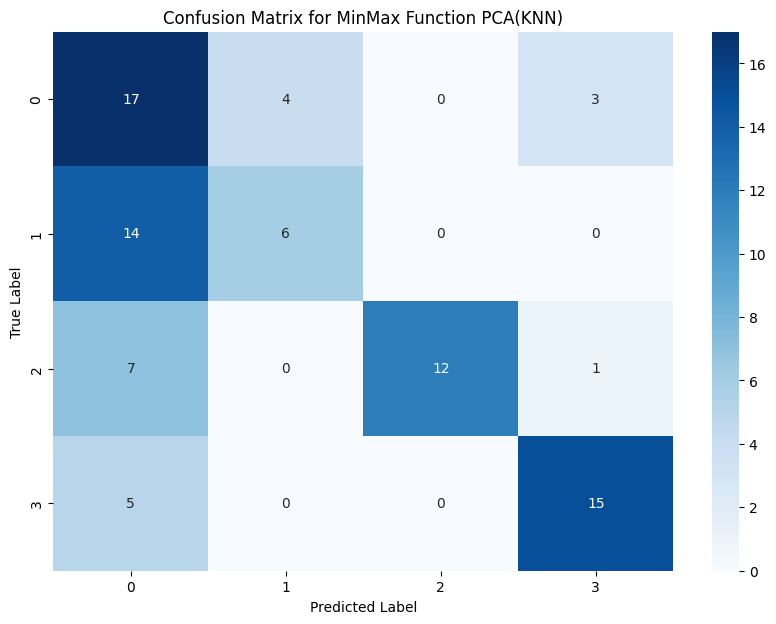

In [ ]:
# Confusion Matrix for MinMax Function PCA(KNN)
plot_confusion_matrix(y_test_minmax, y_pred_knn_pca_minmax, "Confusion Matrix for MinMax Function PCA(KNN)","Confusion Matrix for MinMax Function PCA(KNN).jpg")

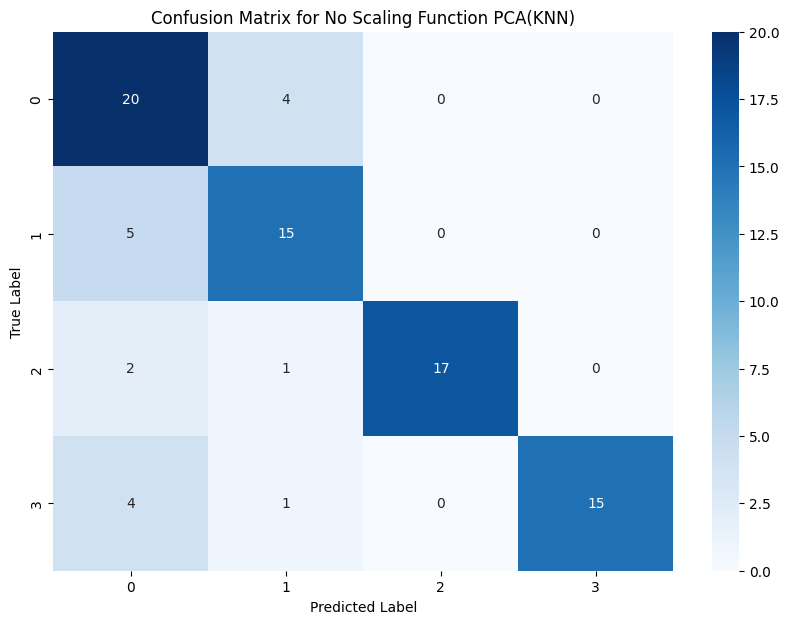

In [ ]:
# Confusion Matrix for No Scaling Function PCA(KNN)
plot_confusion_matrix(y_test, y_pred_knn_pca_normal, "Confusion Matrix for No Scaling Function PCA(KNN)", "Confusion Matrix for No Scaling Function PCA(KNN).jpg")

**KNN with LDA(Std, MinMax, Normal)**

In [35]:
# With Standard Function LDA
knn_classifier_lda_std = KNeighborsClassifier(n_neighbors=3)
knn_classifier_lda_std.fit(X_train_lda_std, y_train_std)
y_pred_knn_lda_std = knn_classifier_lda_std.predict(X_test_lda_std)

print("KNN Classification Report: lda_std")
print(classification_report(y_test_std, y_pred_knn_lda_std, zero_division=1))

# With MinMax Function LDA
knn_classifier_lda_minmax = KNeighborsClassifier(n_neighbors=3)
knn_classifier_lda_minmax.fit(X_train_lda_minmax, y_train_minmax)
y_pred_knn_lda_minmax = knn_classifier_lda_minmax.predict(X_test_lda_minmax)

print("KNN Classification Report: lda_minmax")
print(classification_report(y_test_minmax, y_pred_knn_lda_minmax, zero_division=1))

# With Normal Function LDA
knn_classifier_lda_normal = KNeighborsClassifier(n_neighbors=3)
knn_classifier_lda_normal.fit(X_train_lda_normal, y_train)
y_pred_knn_lda_normal = knn_classifier_lda_normal.predict(X_test_lda_normal)

print("KNN Classification Report: lda_normal")
print(classification_report(y_test, y_pred_knn_lda_normal, zero_division=1))

KNN Classification Report: lda_std
                           precision    recall  f1-score   support

b'Black_sensor_connector'       0.59      0.71      0.64        24
      b'Grey_Cable_Gland'       0.75      0.60      0.67        20
         b'Red_connector'       0.70      0.70      0.70        20
       b'White_connector'       0.74      0.70      0.72        20

                 accuracy                           0.68        84
                macro avg       0.69      0.68      0.68        84
             weighted avg       0.69      0.68      0.68        84

KNN Classification Report: lda_minmax
                           precision    recall  f1-score   support

b'Black_sensor_connector'       0.65      0.71      0.68        24
      b'Grey_Cable_Gland'       0.82      0.70      0.76        20
         b'Red_connector'       0.86      0.90      0.88        20
       b'White_connector'       0.80      0.80      0.80        20

                 accuracy                          

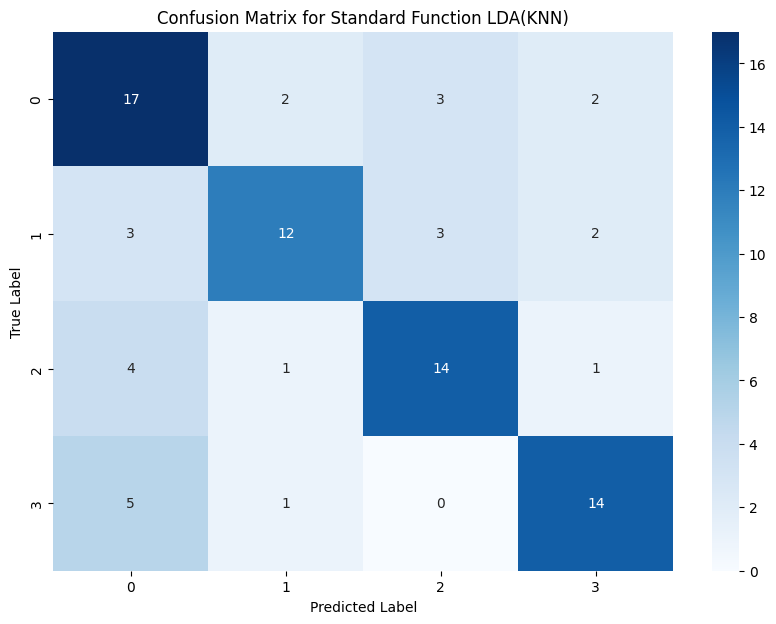

In [ ]:
# Confusion Matrix for Standard Function LDA(KNN)
plot_confusion_matrix(y_test_std, y_pred_knn_lda_std, "Confusion Matrix for Standard Function LDA(KNN)", "Confusion Matrix for Standard Function LDA(KNN).jpg")

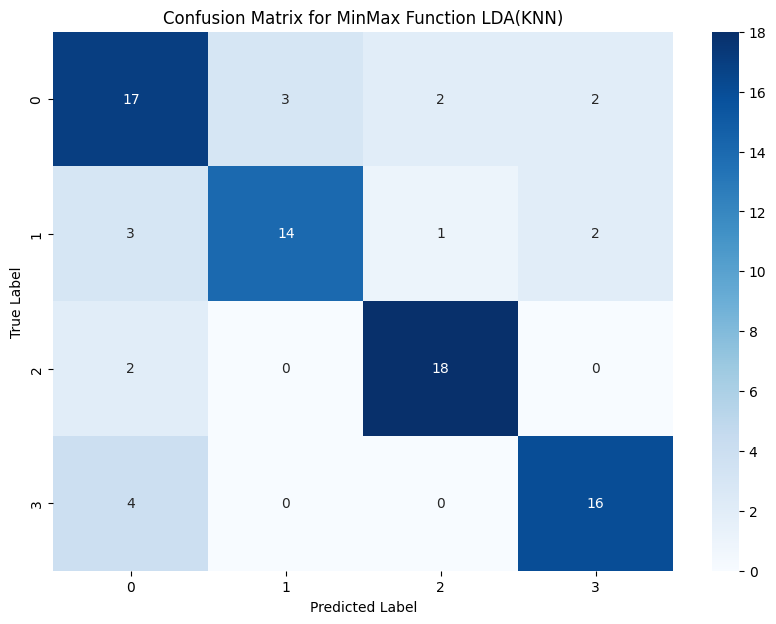

In [ ]:
# Confusion Matrix for MinMax Function LDA(KNN)
plot_confusion_matrix(y_test_minmax, y_pred_knn_lda_minmax, "Confusion Matrix for MinMax Function LDA(KNN)","Confusion Matrix for MinMax Function LDA(KNN).jpg")

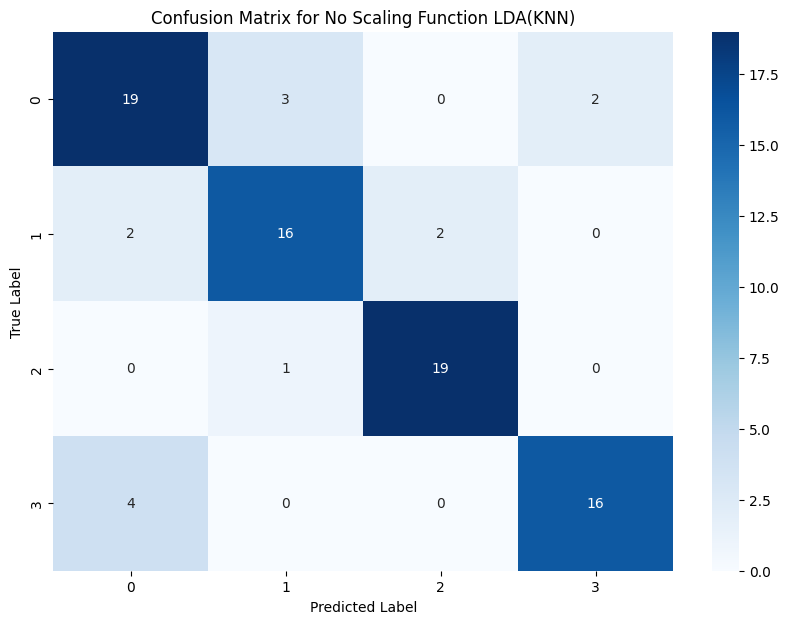

In [ ]:
# Confusion Matrix for No Scaling Function LDA(KNN)
plot_confusion_matrix(y_test, y_pred_knn_lda_normal, "Confusion Matrix for No Scaling Function LDA(KNN)", "Confusion Matrix for No Scaling Function LDA(KNN).jpg")

**Hyper Parameter Tuning**

SVM

In [36]:
# train classifier
classifier_svc = svm.SVC(probability= True)

parameters = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.01, 0.001, 0.0001],
    'kernel': ['rbf','linear']
}

grid_search = GridSearchCV(classifier_svc, parameters)

grid_search.fit(X_train_pca_normal, y_train) # chossing the no scaling as it gave better result in with pca of 83% for svm

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [37]:
# test performance
best_estimator_svm = grid_search.best_estimator_

In [38]:
print(best_estimator_svm)

SVC(C=10, gamma=0.01, probability=True)


In [39]:
y_prediction = best_estimator_svm.predict(X_test_pca_normal)

score = accuracy_score(y_prediction, y_test)

print('{}% of samples were correctly classified'.format(str(score * 100)))

84.52380952380952% of samples were correctly classified


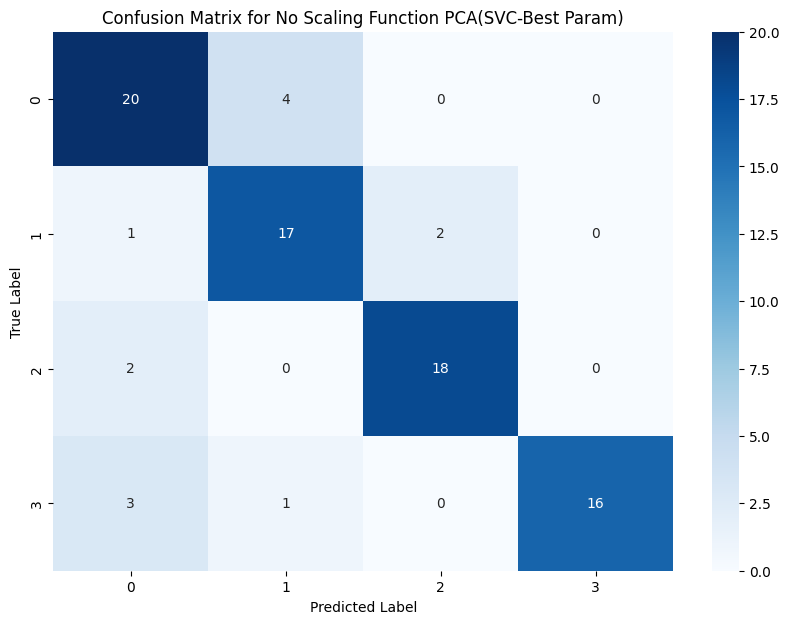

In [ ]:
# Confusion Matrix for No Scaling Function PCA(SVC-Best Param)
plot_confusion_matrix(y_test, y_prediction, "Confusion Matrix for No Scaling Function PCA(SVC-Best Param)",
                      "Confusion Matrix for No Scaling Function PCA(SVC-Best Param)")

KNN

In [40]:
classifier_knn = KNeighborsClassifier()

bag = BaggingClassifier(classifier_knn, random_state=42)

param_grid = {
    'base_estimator__n_neighbors': [2, 3, 5, 7],
    'n_estimators': [5, 10, 15],
    'max_samples': [0.3, 0.5, 0.7,0.9],
    'max_features': [0.3, 0.5, 0.7,0.9]
}

In [41]:
grid_search = GridSearchCV(bag, param_grid, cv=5, scoring='accuracy')

In [42]:
# Fit the grid search to the data
grid_search.fit(X_train_lda_normal, y_train) # chossing the no scaling as it gave better result in with lda of 83% for knn

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_est

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=KNeighborsClassifier(),
                                         random_state=42),
             param_grid={'base_estimator__n_neighbors': [2, 3, 5, 7],
                         'max_features': [0.3, 0.5, 0.7, 0.9],
                         'max_samples': [0.3, 0.5, 0.7, 0.9],
                         'n_estimators': [5, 10, 15]},
             scoring='accuracy')

In [43]:
# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

Best parameters: {'base_estimator__n_neighbors': 3, 'max_features': 0.7, 'max_samples': 0.3, 'n_estimators': 15}
Best cross-validated score: 0.956313725490196


In [44]:
# Use the best estimator to predict on the test set
best_bag = grid_search.best_estimator_
pred_test = best_bag.predict(X_test_lda_normal)
print("Testing accuracy with best parameters: ", accuracy_score(y_test, pred_test))

Testing accuracy with best parameters:  0.7857142857142857


**Prediction(Using SVC with PCA for accuracy of 84%)**

*pca trained model prediction function*

In [45]:
# Function to preprocess
def preprocess_single_image_standard(image_path, size=(128, 128)):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image file does not exist at the specified path: {image_path}")

    resized_image = cv2.resize(image, size)
    flattened_image = resized_image.flatten()
    pca_transformed_image = pca_normal.transform([flattened_image])

    return pca_transformed_image

In [46]:
# Function to predict the label of a single image
def predict_image_label_standard(image_path, model):
    preprocessed_image = preprocess_single_image_standard(image_path)
    predicted_label = model.predict(preprocessed_image)

    return predicted_label[0]

In [47]:
# Example usage: SVC
image_path = '/content/drive/MyDrive/TPR Project/image for checking/White.jpg'  # images are from online
try:
    predicted_label_ = predict_image_label_standard(image_path, best_estimator_svm)
    print(f"Predicted label : {predicted_label_}")
except FileNotFoundError as e:
    print(e)

Predicted label : b'White_connector'


**Additionally Using Neural Network**

In [48]:
# using pca std data
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=42
                    )

clf.fit(X_train_std, y_train_std)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=42,
              solver='lbfgs')

In [49]:
y_prediction = clf.predict(X_test_std)

score = accuracy_score(y_prediction, y_test_std)

print('{}% of samples were correctly classified'.format(str(score * 100)))

69.04761904761905% of samples were correctly classified


**Model Download**

In [53]:
import joblib
import pickle

# Save the scikit-learn model
pickle.dump(best_estimator_svm, open('Image_Classifier.pkl','wb'))

# To load the model later:
# loaded_model = joblib.load('Image_Classifier.pkl')

In [54]:
pickle.dump(pca_normal,open('pca_normal.pkl', 'wb'))

In [55]:
pickle.dump(preprocess_single_image_standard, open('preprocess_single_image_standard.pkl', 'wb'))

In [56]:
pickle.dump(predict_image_label_standard, open('predict_image_label_standard.pkl', 'wb'))